### Equação de Darcy-Weisbach para a perda de pressão num escoamento

$$\Delta P = f \cdot \left(\frac{L+\Sigma{L_{eq}}}{D}\right) \cdot \frac{V^2}{2g}$$

$\Delta P$ = perda de carga ao longo do comprimento do tubo (mca)

$f$ = fator de atrito de Darcy-Weisbach (adimensional)

$L$ = comprimento do tubo (m)

$L_{eq}$ = comprimento equivalente de acessórios (m)

$V$ = velocidade do líquido no interior do tubo (m/s)

$D$ = diâmetro interno do tubo (m)

$g$ = aceleração da gravidade local (m/$s^2$)

## Equação de Colebrook-White

$$\frac{1}{\sqrt{f}} = -2 \log_{10}\left(\frac{\varepsilon}{3.7D} + \frac{2.51}{Re\sqrt{f}}\right)$$

$\epsilon$ = rugosidade equivalente da parede do tubo (m)

$Re$ = número de Reynolds (adimensional)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.optimize import fsolve

In [2]:
def calculate_friction_coefficient(Re, ED):
    f = np.zeros_like(Re)
    for k, Re_val in enumerate(Re):
        if Re_val < 2400:
            f[k] = 64 / Re_val
        else:
            func = lambda x: 1/np.sqrt(x) + 2*np.log10(ED/3.7 + 2.51/(Re_val*np.sqrt(x)))
            x0 = 0.03  # chute inicial para encontrar o f
            f[k] = fsolve(func, x0)  # Calcular f
    return f

In [37]:
def plot_friction_coefficient(Re, f, ED):
    plt.loglog(Re, f,color = 'k')
    
    #Configurações gerais
    plt.title('Diagrama coeficiente de fricção - $\mathit{f}$')
    plt.xlabel('$Re = \\frac{\\rho v D}{\\mu}$', fontsize = 15)
    plt.ylabel('$\mathit{f}$', fontsize = 15)
    plt.grid(visible=True, which='both', linestyle = '--')
    plt.xlim(Re[0], Re[-1])
    plt.ylim(0.75*min(f), 1)
    
    #Posicionar yticks
    locs1 = np.arange(0.1,1,0.1)
    locs2 = np.arange(0,0.1,0.01)
    ymajorLocator = matplotlib.ticker.FixedLocator(locs=np.concatenate((locs1,locs2))) 
    ymajorFormatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().yaxis.set_major_locator( ymajorLocator )
    plt.gca().yaxis.set_major_formatter( ymajorFormatter )
    
    #Posicionar ED ao lado das curvas 
    plt.text(Re[-1]*1.1, f[-1]*0.98, '$\epsilon/D$ = {}'.format(ED), fontsize = 10)


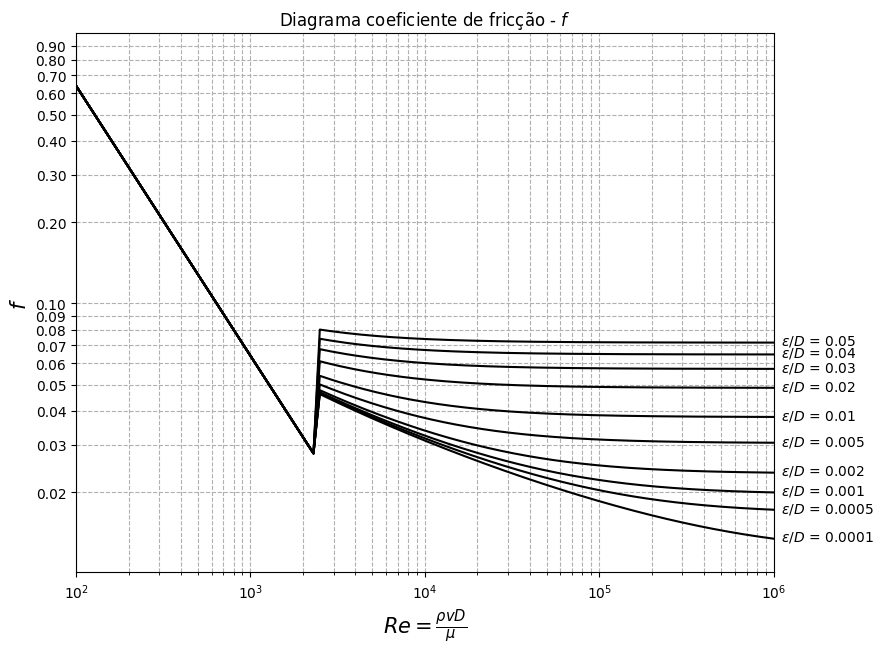

In [39]:
Re = np.linspace(100, 1e6, 5000)
rugosidades_relativas = [0.05,0.04,0.03,0.02, 0.01, 0.005,0.002,0.001,0.0005, 0.0001]

plt.figure(figsize=(9,7))

for ED in rugosidades_relativas:
    f = calculate_friction_coefficient(Re, ED)
    plot_friction_coefficient(Re, f, ED)

plt.savefig('diagrama/friction_coefficient.png', bbox_inches='tight')
